# Credit Card Fraud Detection

## Dataset Brief

1. TRANSACTION_ID --- Unique Transaction Number
2. TX_DATETIME --- Date of Transaction made
3. CUSTOMER_ID --- Unique Customer Number
4. TERMINAL_ID --- Unique Terminal ID where Transaction has been made
5. TX_AMOUNT --- Transaction Amount
6. TX_TIME_SECONDS --- Timetaken for Completing Transaction in Seconds
7. TX_TIME_DAYS --- Timetaken for Completing Transaction in Days
8. TX_FRAUD --- 0 means Legitimate Transaction & 1 means Fraud Transaction
9. TX_FRAUD_SCENARIO --- 1, 2 & 3 Describes Type of Fraud Transaction

In [1]:
! pip install imblearn

In [2]:
# Importing Libraries for Data Cleaning & EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Preprocessing Libraries

from sklearn.model_selection import train_test_split

# Best Parameters Selection Libraries

from sklearn.model_selection import GridSearchCV

# Model Metrics Libraries

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Model Build Libraries
# Logistic Regression

from sklearn.linear_model import LogisticRegression

# K nearest neighbour

from sklearn.neighbors import KNeighborsClassifier


# Oversampling Libraries

from imblearn.over_sampling import SMOTE

## Data Checking

In [3]:
# Import the dataset

data = pd.read_csv("D:/04 Data Science - The Dream/Projects/Project 3 - Credit Card Fraud Detection/Final Transactions.csv")

In [4]:
# Data Overview

data.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0


In [5]:
# Renaming Columns for better comprehension

data = data.rename(columns = {"TRANSACTION_ID" : "Transaction ID",
                    "TX_DATETIME" : "Transaction_date",
                    "CUSTOMER_ID" : "Customer_ID",
                    "TERMINAL_ID" : "Terminal_ID",
                   "TX_AMOUNT" : "Transaction_Amount",
                   "TX_TIME_SECONDS" : "Transaction_Time_Secs",
                   "TX_TIME_DAYS" : "Transaction_Time_Days",
                   "TX_FRAUD" : "Fraud_Status",
                   "TX_FRAUD_SCENARIO" : "Fraud_Type"})

In [6]:
# Data Overview after renaming columns
data.head()

,Unnamed: 0,Transaction ID,Transaction_date,Customer_ID,Terminal_ID,Transaction_Amount,Transaction_Time_Secs,Transaction_Time_Days,Fraud_Status,Fraud_Type
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0


In [7]:
# Basic info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   Transaction ID         int64  
 2   Transaction_date       object 
 3   Customer_ID            int64  
 4   Terminal_ID            int64  
 5   Transaction_Amount     float64
 6   Transaction_Time_Secs  int64  
 7   Transaction_Time_Days  int64  
 8   Fraud_Status           int64  
 9   Fraud_Type             int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 133.8+ MB


1. Transaction date is in object datatype which should be converted into datetime 
2. Target attribute is Fraud_status

In [8]:
# Shape of the dataset

data.shape

(1754155, 10)

In [9]:
# Null Value Check

data.isnull().sum()

Unnamed: 0               0
Transaction ID           0
Transaction_date         0
Customer_ID              0
Terminal_ID              0
Transaction_Amount       0
Transaction_Time_Secs    0
Transaction_Time_Days    0
Fraud_Status             0
Fraud_Type               0
dtype: int64

As evident, there are no null values

In [10]:
# Check for Unique Values

data.nunique()

Unnamed: 0               1754155
Transaction ID           1754155
Transaction_date         1635076
Customer_ID                 4990
Terminal_ID                10000
Transaction_Amount        177586
Transaction_Time_Secs    1635076
Transaction_Time_Days        183
Fraud_Status                   2
Fraud_Type                     4
dtype: int64

## EDA

In [11]:
data.head()

,Unnamed: 0,Transaction ID,Transaction_date,Customer_ID,Terminal_ID,Transaction_Amount,Transaction_Time_Secs,Transaction_Time_Days,Fraud_Status,Fraud_Type
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0


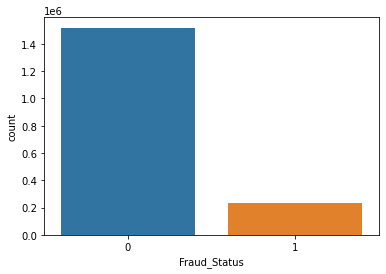

In [12]:
# Pie Chart to check fraud transations and legitimate trasactions proportions
sns.countplot(data = data, x = "Fraud_Status")
plt.show()

Oservation:

Legitimate transactions are much higher than the fraud transactions

In [13]:
# Checking whether transaction time taken is resulting in fraud traction

data["Fraud_Status"].loc[(data["Transaction_Time_Days"] > 0) & (data["Fraud_Status"] == 1)].count()

234761

In [14]:
x = [data["Fraud_Status"].loc[(data["Transaction_Time_Days"]<=0)].count(), 
    data["Fraud_Status"].loc[(data["Transaction_Time_Days"] > 0)].count()]
x

[9488, 1744667]

In [15]:
# Check for total number of fraud transactions

data["Fraud_Status"].loc[~(data["Fraud_Status"] == 0)].count()

235969

In [16]:
# Nos of transaction which are fraud and completed same day

data["Fraud_Status"].loc[(data["Transaction_Time_Days"] < 1) & (data["Fraud_Status"] == 1)].count()

1208

In [17]:
# Ckeck for total number of Legitimate transactions

data["Fraud_Status"].loc[(data["Fraud_Status"] == 0)].count()

1518186

In [18]:
# Nos of transaction which are Legitimate and completed same day

data["Fraud_Status"].loc[(data["Transaction_Time_Days"] < 1) & (data["Fraud_Status"] == 0)].count()

8280

In [19]:
# Nos of transaction which are Legitimate and completed after a day or more

data["Fraud_Status"].loc[(data["Transaction_Time_Days"] > 0) & (data["Fraud_Status"] == 0)].count()

1509906

Transaction_Time_Days for legitimate and fraud transactions are mostly greater than or equal to a day. Therefore this attribute cannot decide on the Fraud Transaction status

In [20]:
data["Transaction_Amount"].nunique()

177586

In [21]:
data["Terminal_ID"].nunique()

10000

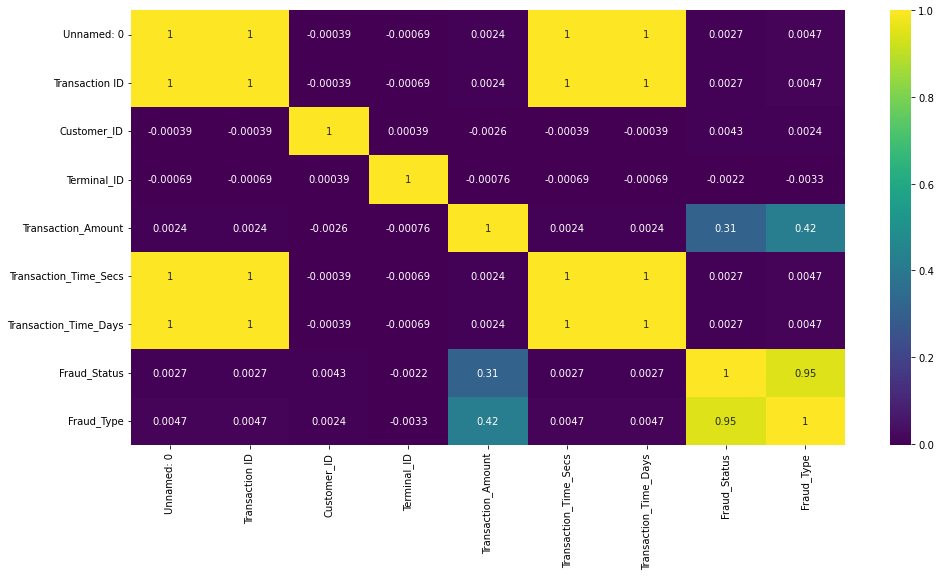

In [22]:
# Plot Corelation Matrix
plt.figure(figsize = (16,8))
correlation = data.corr().round(5)
sns.heatmap(correlation, annot = True, cmap="viridis")
plt.show()

The following attribute pairs are highly co-related i.e pearsons co-efficient greater than 0.70

1. Unnamed & Transaction_Time_Days
2. Unnamed & Transaction_Time_Secs
3. Transaction ID & Transaction_Time_Days
4. Transaction ID & Transaction_Time_Secs
5. Transaction_Time_Secs & Transaction_Time_Days
6. Fraud_Status & Fraud_Type

Therefore, we can drop attributes - Unnamed, Transaction_ID, Transaction_time_Secs & Fraud Type based on the corelations. Fraud_Status cannot be dropped as it is our Target Variable

In [23]:
# Drop the non-significant attributes

data = data.drop(columns = ["Unnamed: 0", "Transaction ID", "Transaction_Time_Secs", "Fraud_Type"], axis = 1)

In [24]:
# Overview of dataset
data.head()

,Transaction_date,Customer_ID,Terminal_ID,Transaction_Amount,Transaction_Time_Days,Fraud_Status
0,2023-01-01 00:00:31,596,3156,533.07,0,0
1,2023-01-01 00:02:10,4961,3412,808.56,0,0
2,2023-01-01 00:07:56,2,1365,1442.94,0,1
3,2023-01-01 00:09:29,4128,8737,620.65,0,0
4,2023-01-01 00:10:34,927,9906,490.66,0,0


## Data Preprocessing

In [25]:
# Check for Datatype of Attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 6 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Transaction_date       object 
 1   Customer_ID            int64  
 2   Terminal_ID            int64  
 3   Transaction_Amount     float64
 4   Transaction_Time_Days  int64  
 5   Fraud_Status           int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 80.3+ MB


Lets convert Transaction_date attribute datatype from 'object' to 'datetime'

In [26]:
data["Transaction_date"] = pd.to_datetime(data["Transaction_date"])
data["Customer_ID"] = data["Customer_ID"].astype("str")
data["Terminal_ID"] = data["Terminal_ID"].astype("str")

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 6 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Transaction_date       datetime64[ns]
 1   Customer_ID            object        
 2   Terminal_ID            object        
 3   Transaction_Amount     float64       
 4   Transaction_Time_Days  int64         
 5   Fraud_Status           int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 80.3+ MB


In [28]:
# Train Test Split
X = data.drop(["Fraud_Status", "Transaction_date"], axis = 1)
y = data["Fraud_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 19)

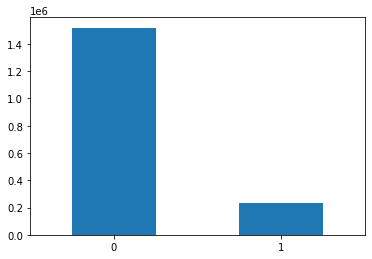

In [29]:
# Check for y data distribution

y.value_counts().plot(kind = "bar")
plt.xticks (rotation = 0)
plt.show()

As it is evident that data is imbalance in target variable. We shall build the model with the same distribution. Subsequently, we shall oversample the minority class and build the model again.

# Model - Logistic Regression

In [30]:
# Call and store Logistic Regression to a variable
log_reg = LogisticRegression()

In [31]:
# Fit training dataset

log_reg.fit(X_train, y_train)

LogisticRegression()

In [32]:
# Predict test dataset
y_pred = log_reg.predict(X_test)

In [33]:
# Compute accuracy & confusion matrix as a measure of prediction
con_mat = confusion_matrix(y_pred, y_test)
acc_score = accuracy_score(y_pred, y_test)

In [34]:
print(con_mat)
print(round(acc_score*100, 2))

[[455343   3113]
 [    24  67767]]
99.4


In [35]:
# Compute precision and recall

# In the current scenario, recall is more important than precision. 
# Precision = TP / (TP+FP) -- A legitimate transaction is classified as Fraud 
# Recall = TP / (TP+FN) -- A Fraud transaction is classified as legitimate 
# A legitimate transaction classified as fraud has less adverse affect than viceversa therefore recall is pivotal

precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)

print(precision, "\n", recall)

0.9560806997742664 
 0.9996459707040758


Logistic Regression model fits very well. 

However, the same model may not predict the right class for the newdata. Since the current data on which model is trained is bias.

Therefore we shall oversample fraud class to match legitimate class so that model can learn more precise pattern.

# Oversampling Technique

This technique is used to reproduce synthetic labels of the minority class to match the majority class

In [36]:
sm = SMOTE(random_state=19)

In [37]:
X_train_os, y_train_os = sm.fit_resample(X_train, y_train)

In [38]:
print("Before Oversampling, total count of label '1' : {}".format(sum(y_train==1)))
print("Before Oversampling, total count of label '0' : {}".format(sum(y_train==0)))

print("After Oversamplling, shape of X_train : {}".format(X_train_os.shape))
print("After Oversamplling, shape of y_train : {}".format(y_train_os.shape))

print("After Oversampling, total count of label '1' : {}".format(sum(y_train_os==1)))
print("After Oversampling, total count of label '0' : {}".format(sum(y_train_os==0)))

Before Oversampling, total count of label '1' : 165089
Before Oversampling, total count of label '0' : 1062819
After Oversamplling, shape of X_train : (2125638, 4)
After Oversamplling, shape of y_train : (2125638,)
After Oversampling, total count of label '1' : 1062819
After Oversampling, total count of label '0' : 1062819


In [39]:
# Training the oversampled data for Logistic regression model

log_reg.fit(X_train_os, y_train_os)

LogisticRegression()

In [40]:
y_pred_os = log_reg.predict(X_test)

In [41]:
con_mat_os = confusion_matrix(y_pred_os, y_test)
acc_score = accuracy_score(y_pred_os, y_test)

print("Confustion matrix after oversampling : \n{}".format(con_mat_os))
print("Accuracy Score after oversampling : \n{}%".format(round(acc_score*100,2)))

Confustion matrix after oversampling : 
[[427350   2324]
 [ 28017  68556]]
Accuracy Score after oversampling : 
94.23%


Previously due to sampling bias the accuracy was close to 100%, however, after non-biased sampling accuracy has dropped to 94%.

Let us train the model using other classifiers

# K-nearest neighbors

In [42]:
knn = KNeighborsClassifier()

In [ ]:
# Finding the best parameters before fitting the model

parameters = {"n_neighbors" : [1,2,3,5,6,7], 
              "weights" : ["uniform", "distance"], 
              "leaf_size" : [5,10,15,20,25]}
gs_cv_knn = GridSearchCV(knn, param_grid=parameters)
gs_cv_knn.fit(X_train_os, y_train_os)